In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import time

from numpy import genfromtxt
from scipy import stats

In [2]:
start_time = time.time()

In [3]:
def read_data(file_name):
    df = pd.read_csv(file_name, sep='\t', header=None)
    return df

In [4]:
df = read_data('lezhin_public_dataset_training.tsv')

C:\Users\deera\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
# df.iloc[:, :20]
del df[7], df[8], df[16], df[18]

In [6]:
df.describe()

,0,1,2,3,4,5,6,9,10,11,...,167,168,169,170,171,172,173,174,175,176
count,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,...,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06,1.279027e+06
mean,2.169985e-01,1.327282e-01,2.840949e-01,1.115090e-01,2.589148e-01,2.636578e+00,7.994948e+01,-5.841105e+14,1.291841e-02,1.485504e-05,...,1.166512e-05,6.843252e-02,5.184376e-03,2.199250e-06,3.106541e-05,2.997524e-04,1.249980e-01,3.696069e-02,4.047608e-07,4.232123e-06
std,4.122018e-01,3.392809e-01,4.509824e-01,3.147615e-01,4.380389e-01,6.181888e+00,1.290465e+02,7.339708e+16,1.129227e-01,3.854197e-03,...,1.123908e-03,1.463250e-01,3.121712e-02,4.712688e-04,2.538336e-03,8.295776e-03,2.005742e-01,7.977981e-02,1.090358e-04,8.696757e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.223372e+18,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.940000e-02,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.560000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504000e-01,2.880000e-02,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.300000e+01,6.574000e+03,1.900000e+01,1.000000e+00,1.000000e+00,...,3.883000e-01,8.586000e-01,9.111000e-01,4.424000e-01,5.783000e-01,8.418000e-01,9.545000e-01,7.078000e-01,1.044000e-01,4.217000e-01


In [7]:
features = df.iloc[:, 1:].values
labels = df.iloc[:, :1].values
print(stats.describe(features).variance)
print(features.shape, labels.shape)

[  1.15111543e-01   2.03385131e-01   9.90748072e-02   1.91878069e-01
   3.82157440e+01   1.66529942e+04   5.38713173e+33   1.27515383e-02
   1.48548331e-05   4.08220688e-02   1.02018734e-01   4.10086862e-02
   3.25354759e-03   2.45624487e-01   4.74883876e+01   4.61867511e+01
   6.06847586e+01   6.37896923e+01   3.75022068e+01   3.60551168e+01
   4.33698589e+01   9.70587381e+01   1.86694818e+01   7.72218115e+01
   2.60344947e+01   1.45445092e+01   1.19066626e+01   3.46125399e+01
   6.31201610e+01   3.17641667e+01   7.50052257e+01   1.10501155e+01
   2.10309402e+01   1.66279723e+01   7.25443018e+01   1.77452340e+01
   1.15795158e+01   4.99343761e+01   2.28384809e+01   3.34100286e+01
   6.02445649e+01   2.68082260e+01   4.05038849e+01   4.55097056e+01
   6.09638438e+01   8.83403558e+00   2.79942773e+01   6.37632101e+01
   3.38823571e+01   4.19303788e+01   3.53614873e+01   5.84163897e+00
   9.37152581e+00   2.26425774e+01   7.53624179e+00   1.58830375e+00
   7.40874098e+00   8.91352938e+00

In [8]:
rnd_indices = np.random.rand(len(features)) < 0.70

train_x = features[rnd_indices]
train_y = labels[rnd_indices]
test_x = features[~rnd_indices]
test_y = labels[~rnd_indices]
print("train row count : %d, test row count : %d" % (train_x.shape[0], test_x.shape[0]))

feature_count = train_x.shape[1]
label_count = train_y.shape[1]
print(feature_count, label_count)

train row count : 896439, test row count : 382588
172 1


In [9]:
training_epochs = 90
learning_rate = 0.01
cost_history = np.empty(shape=[1],dtype=float)
nb_classes = 2

X = tf.placeholder(tf.float32,[None,feature_count])
Y = tf.placeholder(tf.int32,[None,label_count])
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

one_hot Tensor("one_hot:0", shape=(?, 1, 2), dtype=float32)
reshape Tensor("Reshape:0", shape=(?, 2), dtype=float32)


In [10]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.1)), tf.Variable(tf.random_normal([shape[1]]))

def make_hidden_layer(previous_h, weight, bias, p_keep_hidden, is_dropout=True):
    h = tf.nn.relu(tf.matmul(previous_h, weight) + bias)
    if is_dropout:
        h = tf.nn.dropout(h, p_keep_hidden)
    return h

def model(X, p_keep_hidden):
    s_1 = feature_count + 2
    s_2 = feature_count + 2
    s_3 = feature_count
    
    w_h, b = init_weights([feature_count, s_1])
    w_h2, b2 = init_weights([s_1, s_2])
    w_h3, b3 = init_weights([s_2, s_3])
    w_o, b_o = init_weights([s_3, nb_classes])
    
    h = make_hidden_layer(X, w_h, b, p_keep_hidden)
    h2 = make_hidden_layer(h, w_h2, b2, p_keep_hidden)
    h3 = make_hidden_layer(h2, w_h3, b3, p_keep_hidden, False)
    
    return tf.matmul(h3, w_o) + b_o

In [11]:
p_keep_hidden = tf.placeholder("float")

h0 = model(X, p_keep_hidden)

In [12]:
# Cross entropy cost/loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=h0, labels=Y_one_hot))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [13]:
prediction = tf.argmax(h0, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
print(X.shape, Y.shape)
training_dropout_h = 0.95

batch_size = 2000
batch_length = int(train_x.shape[0] / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        for batch_num in range(batch_length):
            start_idx = batch_num * batch_size
            end_idx = (train_x.shape[0] - 1) if batch_num == batch_length - 1 else (batch_num + 1) * batch_size
                
            if batch_num % 200 == 0 or batch_num == batch_length - 1:
                print("batch num : %d / %d, index: %d ~ %d" % (batch_num, batch_length - 1, start_idx, end_idx))
            
            sess.run(optimizer, feed_dict={X: train_x[start_idx:end_idx], Y: train_y[start_idx:end_idx], p_keep_hidden: training_dropout_h})

        loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: train_x, Y: train_y, p_keep_hidden: training_dropout_h})
        cost_history = np.append(cost_history, acc)
        if step % 4 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    pre = tf.argmax(h0, 1)
    test_yy = np.transpose(test_y.ravel())
    print(test_yy.shape)
    correct_prediction = tf.equal(pre, test_yy)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Test Accuracy:', sess.run(accuracy, feed_dict={X: test_x, p_keep_hidden: 1.0}))

(896439, 172) (896439, 1)
(382588, 172) (382588, 1)
(?, 172) (?, 1)
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
Step:     0	Loss: 1.465	Acc: 51.58%
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
Step:     4	Loss: 0.3

batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
Step:    44	Loss: 0.024	Acc: 99.29%
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
Step:    48	Loss: 0.021	Acc: 99.27%
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch n

Step:    88	Loss: 0.005	Acc: 99.88%
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
batch num : 0 / 447, index: 0 ~ 2000
batch num : 200 / 447, index: 400000 ~ 402000
batch num : 400 / 447, index: 800000 ~ 802000
batch num : 447 / 447, index: 894000 ~ 896438
(382588,)
Test Accuracy: 0.999856


(92,)


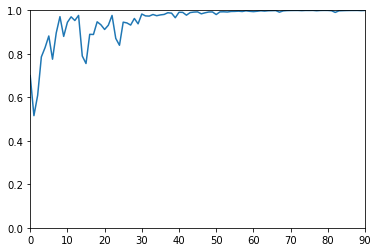

In [15]:
print(cost_history.shape)
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,1])
plt.show()

In [16]:
sess.close()
end_time = time.time()
print("processing time : %d seconds" % (end_time - start_time,))

processing time : 241 seconds
